<a href="https://colab.research.google.com/github/rtomazini42/scriptsAleatoriosPy/blob/master/AIAUFRPELC_Renan_Tomazini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
pip install susi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for susi: filename=susi-1.2.2-py3-none-any.whl size=26889 sha256=8aafa3a2bc90eced5436e49e23e7057958df44d5e814cc0a09055be085ae5842
  Stored in directory: /root/.cache/pip/wheels/0b/64/36/b21fb1595a8c693b545719175d354c3ed710896f5b4c4d6763
Successfully built susi


# Questão 1
Bases de dados Investigadas:
1. Iris
2. Breast Cancer
3. Car Evaluation


Comparar os algoritmos kNN, Árvores de Decisão, Naive Bayes e Redes Neurais MLP
para cada uma dessas bases de dados.

KNN -> 1;3;5;7

MLP -> 5;10;20
MLP_taxaAprendizagem -> 0.1; 0.9; 0.001
MLP_epocas -> 100; 50; 10







| Base de dados | k | Acerto treinamento | Acerto validação |
|--- |--- |--- |--- |
| iris | 1 | x | x |
| iris | 3 | x | x |
| iris | 5 | x | x |
| iris | 7 | x | x |


##  teste

• Cada algoritmo tem seus próprios parâmetros e esses devem ser ajustados de
acordo com a base de dados.
• A base de dados deve ser dividida em 50% para treinamento, 25% para
validação e 25% para teste.
• A separação dos dados deve ser feita de maneira estratificada.
• Os parâmetros devem ser ajustados utilizando uma busca em grid (grid search)
considerando os conjuntos de treinamento e validação visando a obtenção da
maior (taxa de acerto/acurácia) no conjunto de validação.
• Os parâmetros que resultaram nos melhores desempenhos para validação devem
então ser aplicados no conjunto de teste para se apresentar os resultados reais do
desempenho (taxa de acerto/acurácia) do classificador.
• Os melhores parâmetros devem ser aplicados a 5 ten folds cross validantions
com bases embaralhadas em cada um deles e o resultado (média dos 5 tem folds)
apresentado no final.
• Criar uma nova tabela apresentando o recall de cada classe para os mesmos
experimentos realizados. Dividir a base inteira em 50% treinamento e 50%

teste, escolher a configuração de parâmetros do tem fold cross validation.
[implementar o cálculo do recall]

### Importando libs

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy

## Dataset Iris

In [3]:
import pandas as pd
nomes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', names = nomes)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values



### KNN para IRIS



### Treinando o modelo KNN :
Com KNeighborsClassifier, mudando o K para preencher a tabela

### Avaliação de desempenho:
cv divide em amostras aleatorias, 50% para treino 50% para validação cruzada

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)
kValores = [1,3,5,7]

resultados= {
'base de dados': [],
'K':[],
'score teste':[],
'score validacao' :[]
}


for k in kValores:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores_dt = cross_val_score(knn, X, y, scoring='accuracy', cv=5)
    y_pred = knn.predict(X_test)
    resultados['base de dados'].append('iris')
    resultados['K'].append(k)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df



,base de dados,K,score teste,score validacao
0,iris,1,0.947368,0.960000
1,iris,3,0.973684,0.966667
2,iris,5,0.973684,0.973333
3,iris,7,0.947368,0.980000


### Árvore de decisão para Iris

In [63]:
import matplotlib.pyplot as plt
nomes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', names = nomes)
#print(df)
#Class = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
#df['Class'] = df['Class'].map(Class)
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)

#classificacao = ['Iris-setosa','Iris-versicolor','Iris-virginica']
from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor 
  
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#clf.predict([[2., 2.,2.,2.]])

#plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
#tree.plot_tree(clf, fontsize=10,feature_names=y)

#feature_names=nomes



resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('iris')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df


,base de dados,score teste,score validacao
0,iris,0.973684,0.96


# Naive Bayes para Iris

In [67]:
from sklearn.naive_bayes import GaussianNB
nomes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', names = nomes)
#print(df)
#Class = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
#df['Class'] = df['Class'].map(Class)
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('iris')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,score teste,score validacao
0,iris,0.973684,0.953333


### Redes Neurais MLP para Iris

In [75]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
nomes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.data', names = nomes)
#print(df)
#Class = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
#df['Class'] = df['Class'].map(Class)
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)


#learning_rate_init = taca
#max_iter =epoca


resultados= {
'base de dados': [],
'TaxaDeAprendizado':[],
'epocas':[],
'score teste':[],
'score validacao' :[]
}

taxaDeAprendizado = [0.1, 0.9, 0.001]
epocas = [300,100, 50, 10]

for i in taxaDeAprendizado:
  for e in epocas:
    clf = MLPClassifier(random_state=None, max_iter=e, learning_rate_init = i).fit(X_train, y_train)
    scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    y_pred = clf.predict(X_test)
    resultados['base de dados'].append('iris')
    resultados['TaxaDeAprendizado'].append(i)
    resultados['epocas'].append(e)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df



,base de dados,TaxaDeAprendizado,epocas,score teste,score validacao
0,iris,0.100,300,0.947368,0.966667
1,iris,0.100,100,0.947368,0.973333
2,iris,0.100,50,0.947368,0.973333
3,iris,0.100,10,0.789474,0.686667
4,iris,0.900,300,0.210526,0.333333
5,iris,0.900,100,0.210526,0.333333
6,iris,0.900,50,0.473684,0.400000
7,iris,0.900,10,0.210526,0.353333
8,iris,0.001,300,0.947368,0.973333
9,iris,0.001,100,0.921053,0.906667


### KNN para Breast-Cancer

> Bloco com recuo



Normalizando dados:

In [ ]:
nomes = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('breast-cancer.data', names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

Class = {'recurrence-events':1, 'no-recurrence-events':0}
idade = {'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5}
menopausa = {'premeno':0 ,'ge40':1 ,'lt40':2}
tamanho = {'0-4':0, '5-9':1,'10-14':2, '15-19':3, '20-24':4, '25-29':5, '30-34':6, '35-39':7, '40-44':8, '45-49':9,  '50-54':10}
nodulos = {'0-2':0, '3-5':1 ,'6-8':2, '9-11':3 ,'12-14':4 ,'15-17':5 , '24-26':6}
nodeCaps = {'no':0 ,'yes':1 ,'?':2}
mama = {'left':0, 'right':1}
local = {'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4, '?':5}
iradiado = {'no':0, 'yes':1}
df['Class'] = df['Class'].map(Class)
df['age'] = df['age'].map(idade)
df['menopause'] = df['menopause'].map(menopausa)
df['tumor-size'] = df['tumor-size'].map(tamanho)
df['inv-nodes'] = df['inv-nodes'].map(nodulos)
df['node-caps'] = df['node-caps'].map(nodeCaps)
df['breast'] = df['breast'].map(mama)
df['breast-quad'] = df['breast-quad'].map(local)
df['irradiat'] = df['irradiat'].map(iradiado)



df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,0,6,0,0,3,0,0,0
1,0,2,0,4,0,0,2,1,1,0
2,0,2,0,4,0,0,2,0,0,0
3,0,4,1,3,0,0,2,1,2,0
4,0,2,0,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,0,6,0,0,2,0,2,0
282,1,1,0,4,0,0,3,0,2,1
283,1,4,1,4,0,0,1,1,2,0
284,1,2,1,6,1,0,3,0,0,0


#### validação,treinamento e tabela resultado

In [ ]:
df


X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)
kValores = [1,3,5,7]

resultados= {
'base de dados': [],
'K':[],
'score teste':[],
'score validacao' :[]
}


for k in kValores:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores_dt = cross_val_score(knn, X, y, scoring='accuracy', cv=4)
    y_pred = knn.predict(X_test)
    resultados['base de dados'].append('Breast-Cancer')
    resultados['K'].append(k)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,K,score teste,score validacao
0,Breast-Cancer,1,0.638889,0.660749
1,Breast-Cancer,3,0.638889,0.685055
2,Breast-Cancer,5,0.750000,0.681387
3,Breast-Cancer,7,0.694444,0.706035


### Árvore de decisão para Breast-Cancer

In [82]:
nomes = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('breast-cancer.data', names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

Class = {'recurrence-events':1, 'no-recurrence-events':0}
idade = {'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5}
menopausa = {'premeno':0 ,'ge40':1 ,'lt40':2}
tamanho = {'0-4':0, '5-9':1,'10-14':2, '15-19':3, '20-24':4, '25-29':5, '30-34':6, '35-39':7, '40-44':8, '45-49':9,  '50-54':10}
nodulos = {'0-2':0, '3-5':1 ,'6-8':2, '9-11':3 ,'12-14':4 ,'15-17':5 , '24-26':6}
nodeCaps = {'no':0 ,'yes':1 ,'?':2}
mama = {'left':0, 'right':1}
local = {'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4, '?':5}
iradiado = {'no':0, 'yes':1}
df['Class'] = df['Class'].map(Class)
df['age'] = df['age'].map(idade)
df['menopause'] = df['menopause'].map(menopausa)
df['tumor-size'] = df['tumor-size'].map(tamanho)
df['inv-nodes'] = df['inv-nodes'].map(nodulos)
df['node-caps'] = df['node-caps'].map(nodeCaps)
df['breast'] = df['breast'].map(mama)
df['breast-quad'] = df['breast-quad'].map(local)
df['irradiat'] = df['irradiat'].map(iradiado)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values



In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)


from sklearn import tree

  
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)




resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('breast cancer')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,score teste,score validacao
0,breast cancer,0.597222,0.615426


### Naive Bayes para Breast Cancer

In [84]:
nomes = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('breast-cancer.data', names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

Class = {'recurrence-events':1, 'no-recurrence-events':0}
idade = {'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5}
menopausa = {'premeno':0 ,'ge40':1 ,'lt40':2}
tamanho = {'0-4':0, '5-9':1,'10-14':2, '15-19':3, '20-24':4, '25-29':5, '30-34':6, '35-39':7, '40-44':8, '45-49':9,  '50-54':10}
nodulos = {'0-2':0, '3-5':1 ,'6-8':2, '9-11':3 ,'12-14':4 ,'15-17':5 , '24-26':6}
nodeCaps = {'no':0 ,'yes':1 ,'?':2}
mama = {'left':0, 'right':1}
local = {'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4, '?':5}
iradiado = {'no':0, 'yes':1}
df['Class'] = df['Class'].map(Class)
df['age'] = df['age'].map(idade)
df['menopause'] = df['menopause'].map(menopausa)
df['tumor-size'] = df['tumor-size'].map(tamanho)
df['inv-nodes'] = df['inv-nodes'].map(nodulos)
df['node-caps'] = df['node-caps'].map(nodeCaps)
df['breast'] = df['breast'].map(mama)
df['breast-quad'] = df['breast-quad'].map(local)
df['irradiat'] = df['irradiat'].map(iradiado)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values



In [85]:
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('breast cancer')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,score teste,score validacao
0,breast cancer,0.597222,0.674713


### Redes Neurais MLP para Breast cancer

In [95]:
nomes = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('breast-cancer.data', names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

Class = {'recurrence-events':1, 'no-recurrence-events':0}
idade = {'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5}
menopausa = {'premeno':0 ,'ge40':1 ,'lt40':2}
tamanho = {'0-4':0, '5-9':1,'10-14':2, '15-19':3, '20-24':4, '25-29':5, '30-34':6, '35-39':7, '40-44':8, '45-49':9,  '50-54':10}
nodulos = {'0-2':0, '3-5':1 ,'6-8':2, '9-11':3 ,'12-14':4 ,'15-17':5 , '24-26':6}
nodeCaps = {'no':0 ,'yes':1 ,'?':2}
mama = {'left':0, 'right':1}
local = {'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4, '?':5}
iradiado = {'no':0, 'yes':1}
df['Class'] = df['Class'].map(Class)
df['age'] = df['age'].map(idade)
df['menopause'] = df['menopause'].map(menopausa)
df['tumor-size'] = df['tumor-size'].map(tamanho)
df['inv-nodes'] = df['inv-nodes'].map(nodulos)
df['node-caps'] = df['node-caps'].map(nodeCaps)
df['breast'] = df['breast'].map(mama)
df['breast-quad'] = df['breast-quad'].map(local)
df['irradiat'] = df['irradiat'].map(iradiado)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values



In [96]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)


#learning_rate_init = taca
#max_iter =epoca


resultados= {
'base de dados': [],
'TaxaDeAprendizado':[],
'epocas':[],
'score teste':[],
'score validacao' :[]
}

taxaDeAprendizado = [0.1, 0.9, 0.001]
epocas = [300,100, 50, 10]

for i in taxaDeAprendizado:
  for e in epocas:
    clf = MLPClassifier(random_state=None, max_iter=e, learning_rate_init = i).fit(X_train, y_train)
    scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    y_pred = clf.predict(X_test)
    resultados['base de dados'].append('breast cancer')
    resultados['TaxaDeAprendizado'].append(i)
    resultados['epocas'].append(e)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df


,base de dados,TaxaDeAprendizado,epocas,score teste,score validacao
0,breast cancer,0.100,300,0.680556,0.688990
1,breast cancer,0.100,100,0.722222,0.713370
2,breast cancer,0.100,50,0.763889,0.674713
3,breast cancer,0.100,10,0.694444,0.657169
4,breast cancer,0.900,300,0.694444,0.702783
5,breast cancer,0.900,100,0.694444,0.702783
6,breast cancer,0.900,50,0.694444,0.699335
7,breast cancer,0.900,10,0.694444,0.702783
8,breast cancer,0.001,300,0.722222,0.678282
9,breast cancer,0.001,100,0.763889,0.699274


## Car Evaluation

### KNN Car Evaluation



In [ ]:
nomes = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety', "Class"]
df = pd.read_csv('car_evaluation.csv',index_col = False, names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

preco = {'vhigh':0, 'high':3, 'med':2, 'low':1}
manutencao = {'vhigh':0, 'high':3, 'med':2, 'low':1}
portas = {'2':0, '3':1,'4':2, '5more':3}
pessoas = {'2':0, '4':1, 'more':2}
tamanho = {'small':0,'med':1,'big':2}
seguranca = {'low':0, 'med':1, 'high':2}
classificacao ={'unacc':0,'acc':1, 'vgood':2, 'good':3}


df['buying'] = df['buying'].map(preco)
df['maint'] = df['maint'].map(manutencao)
df['doors'] = df['doors'].map(portas)
df['persons'] = df['persons'].map(pessoas)
df['lug_boot'] = df['lug_boot'].map(tamanho)
df['safety'] = df['safety'].map(seguranca)
df['Class'] = df['Class'].map(classificacao)

df

,buying,maint,doors,persons,lug_boot,safety,Class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,1,3
1724,1,1,3,2,1,2,2
1725,1,1,3,2,2,0,0
1726,1,1,3,2,2,1,3


In [ ]:
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)
kValores = [1,3,5,7]

resultados= {
'base de dados': [],
'K':[],
'score teste':[],
'score validacao' :[]
}


for k in kValores:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores_dt = cross_val_score(knn, X, y, scoring='accuracy', cv=4)
    y_pred = knn.predict(X_test)
    resultados['base de dados'].append('Car Evaluation')
    resultados['K'].append(k)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,K,score teste,score validacao
0,Car Evaluation,1,0.789352,0.647569
1,Car Evaluation,3,0.835648,0.720486
2,Car Evaluation,5,0.861111,0.697338
3,Car Evaluation,7,0.851852,0.701968


### Árvore decição para Car Evaluation

In [90]:
nomes = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety', "Class"]
df = pd.read_csv('car_evaluation.csv',index_col = False, names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

preco = {'vhigh':0, 'high':3, 'med':2, 'low':1}
manutencao = {'vhigh':0, 'high':3, 'med':2, 'low':1}
portas = {'2':0, '3':1,'4':2, '5more':3}
pessoas = {'2':0, '4':1, 'more':2}
tamanho = {'small':0,'med':1,'big':2}
seguranca = {'low':0, 'med':1, 'high':2}
classificacao ={'unacc':0,'acc':1, 'vgood':2, 'good':3}


df['buying'] = df['buying'].map(preco)
df['maint'] = df['maint'].map(manutencao)
df['doors'] = df['doors'].map(portas)
df['persons'] = df['persons'].map(pessoas)
df['lug_boot'] = df['lug_boot'].map(tamanho)
df['safety'] = df['safety'].map(seguranca)
df['Class'] = df['Class'].map(classificacao)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)


from sklearn import tree

  
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)




resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('Car Datar')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,score teste,score validacao
0,Car Datar,0.967593,0.755914


### Naive beyes para Car Evaluation

In [92]:
nomes = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety', "Class"]
df = pd.read_csv('car_evaluation.csv',index_col = False, names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

preco = {'vhigh':0, 'high':3, 'med':2, 'low':1}
manutencao = {'vhigh':0, 'high':3, 'med':2, 'low':1}
portas = {'2':0, '3':1,'4':2, '5more':3}
pessoas = {'2':0, '4':1, 'more':2}
tamanho = {'small':0,'med':1,'big':2}
seguranca = {'low':0, 'med':1, 'high':2}
classificacao ={'unacc':0,'acc':1, 'vgood':2, 'good':3}


df['buying'] = df['buying'].map(preco)
df['maint'] = df['maint'].map(manutencao)
df['doors'] = df['doors'].map(portas)
df['persons'] = df['persons'].map(pessoas)
df['lug_boot'] = df['lug_boot'].map(tamanho)
df['safety'] = df['safety'].map(seguranca)
df['Class'] = df['Class'].map(classificacao)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

In [94]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

resultados= {
'base de dados': [],
'score teste':[],
'score validacao' :[]
}


scores_dt = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)
y_pred = clf.predict(X_test)
resultados['base de dados'].append('Car evaluation')
resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,score teste,score validacao
0,Car evaluation,0.967593,0.622114


### MLP para Car Data

In [97]:
nomes = ['buying', 'maint', 'doors', 'persons', 'lug_boot','safety', "Class"]
df = pd.read_csv('car_evaluation.csv',index_col = False, names = nomes)
df

#for categoria in nomes:
#  print(pd.unique(df[categoria]))

preco = {'vhigh':0, 'high':3, 'med':2, 'low':1}
manutencao = {'vhigh':0, 'high':3, 'med':2, 'low':1}
portas = {'2':0, '3':1,'4':2, '5more':3}
pessoas = {'2':0, '4':1, 'more':2}
tamanho = {'small':0,'med':1,'big':2}
seguranca = {'low':0, 'med':1, 'high':2}
classificacao ={'unacc':0,'acc':1, 'vgood':2, 'good':3}


df['buying'] = df['buying'].map(preco)
df['maint'] = df['maint'].map(manutencao)
df['doors'] = df['doors'].map(portas)
df['persons'] = df['persons'].map(pessoas)
df['lug_boot'] = df['lug_boot'].map(tamanho)
df['safety'] = df['safety'].map(seguranca)
df['Class'] = df['Class'].map(classificacao)

X = df[df.columns.difference(['Class'])].values
y = df['Class'].values

In [98]:
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size = 0.5, random_state=4)


#learning_rate_init = taca
#max_iter =epoca


resultados= {
'base de dados': [],
'TaxaDeAprendizado':[],
'epocas':[],
'score teste':[],
'score validacao' :[]
}

taxaDeAprendizado = [0.1, 0.9, 0.001]
epocas = [300,100, 50, 10]

for i in taxaDeAprendizado:
  for e in epocas:
    clf = MLPClassifier(random_state=None, max_iter=e, learning_rate_init = i).fit(X_train, y_train)
    scores_dt = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    y_pred = clf.predict(X_test)
    resultados['base de dados'].append('Car Evaluation')
    resultados['TaxaDeAprendizado'].append(i)
    resultados['epocas'].append(e)
    resultados['score teste'].append(metrics.accuracy_score(y_test, y_pred))
    resultados['score validacao'].append(scores_dt.mean())


df = pd.DataFrame(resultados)
df

,base de dados,TaxaDeAprendizado,epocas,score teste,score validacao
0,Car Evaluation,0.100,300,0.976852,0.806176
1,Car Evaluation,0.100,100,0.946759,0.803336
2,Car Evaluation,0.100,50,0.930556,0.784804
3,Car Evaluation,0.100,10,0.784722,0.747811
4,Car Evaluation,0.900,300,0.701389,0.684626
5,Car Evaluation,0.900,100,0.701389,0.700233
6,Car Evaluation,0.900,50,0.701389,0.700233
7,Car Evaluation,0.900,10,0.701389,0.700233
8,Car Evaluation,0.001,300,0.925926,0.799841
9,Car Evaluation,0.001,100,0.835648,0.766308


# Questão 2

Para a base de dados artificial, realizar 5 execuções do Perceptron e plotar a reta em um
gráfico com os dados da base.
- Extrair os pesos calculados pelo Perceptron e plotar os dados e a reta.

### criando base de dados

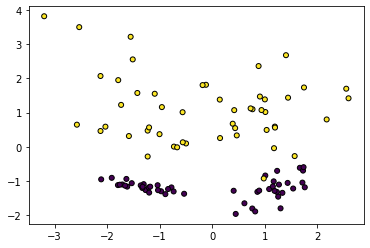

In [143]:
from sklearn.datasets import make_classification


X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2, class_sep=1.2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")


### Usando percepton

Text(0.5, 1.0, 'Perceptron')

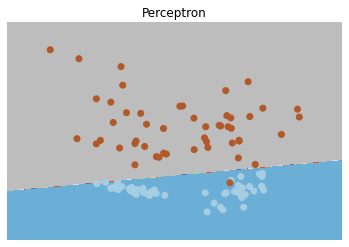

In [160]:
from sklearn.linear_model import Perceptron
import numpy as np
X, y = X, Y
clf = Perceptron(tol=1e-3, random_state=0) #5 execuções já no default
clf.fit(X, y)
clf.score(X, y)
h = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#cmap = 1dbc91-3cc079-5bc461-7cd161-9ddd60-b4ee90-caffbf-e4ffbb-fdffb6
ax.contourf(xx, yy, Z, cmap=plt.cm.tab20c)
ax.axis('off')

ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')

# Questão 3

Bases de dados Investigadas:
1. Seeds
2. Aggregation (https://cs.joensuu.fi/sipu/datasets/Aggregation.txt)
3. Compound (https://cs.joensuu.fi/sipu/datasets/Compound.txt)
Comparar 3 diferentes configurações dos algoritmos kMedias, DBScan e Redes SOM
para cada uma dessas bases de dados.






* Gerar uma tabela com o mesmo formato da tabela do experimento da questão 1
apresentando as métricas: coeficiente de silhouette; tendência de agrupamento e
matriz de similaridade. [implementar cada uma dessas métricas]
* Para a métrica tendência de agrupamento deverá ser gerada uma nova base de
dados respeitando a distribuição estatística uniforme.
* Para as bases Aggregation e Compound deve-se apresentar o resultado do
melhor agrupamento no formato 2d.

## Seeds

### abrindo os seeds

In [266]:
df = pd.read_csv('base1.txt',sep = "\t", names = ['x','y', 'Class'])
df



,x,y,Class
0,0.169883,0.160531,-1
1,0.436050,0.426027,-1
2,0.140495,0.048773,-1
3,0.210789,0.130330,-1
4,0.247663,0.283190,-1
...,...,...,...
95,0.841689,0.969560,1
96,0.741610,0.593571,1
97,0.841240,0.918840,1
98,0.974732,0.993811,1


### Kmeans 
### DBScan 
### Redes SOM

In [269]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics


resultados= {
'algoritmo':[],
'base de dados': [],
'silhouette':[],
'tendência de agrupamento':[],
'matriz de similaridade' :[]
}

datasetKNN = df

resultados['base de dados'].append('Seeds')
resultados['algoritmo'].append('kmeans')

kmeans = KMeans(n_clusters=2, random_state=0).fit(datasetKNN)
#kmeans.labels_

labels = kmeans.labels_
resultados['silhouette'].append(metrics.silhouette_score(datasetKNN, labels, metric='euclidean'))


resultados['tendência de agrupamento'].append(davies_bouldin_score(datasetKNN, labels))


clustering = AffinityPropagation().fit(datasetKNN)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)

resultados['matriz de similaridade'].append(n_clusters_)


#DBSCAN
resultados['algoritmo'].append('DBSCAN')

from sklearn.cluster import DBSCAN
df = pd.read_csv('base1.txt',sep = "\t", names = ['x','y', 'Class'])
df

datasetDBSCAN = df

clustering = DBSCAN(eps=3, min_samples=2).fit(datasetDBSCAN)
labels = clustering.fit_predict(datasetDBSCAN)

resultados['base de dados'].append('Seeds')


labels = clustering.labels_

resultados['silhouette'].append(metrics.silhouette_score(datasetDBSCAN, kmeans.labels_))

resultados['tendência de agrupamento'].append(davies_bouldin_score(datasetDBSCAN, kmeans.labels_))

clustering = AffinityPropagation().fit(datasetDBSCAN)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)


resultados['matriz de similaridade'].append(n_clusters_)


# Redes SOM
resultados['algoritmo'].append('Redes SOM')
resultados['base de dados'].append('Seeds')

#from sklearn_som.som import SOM

datasetSOM = df


#dataset_data = dataset.data[:, :2]
#dataset_label = dataset.target

import susi
som = susi.SOMClustering()
som.fit(datasetSOM)

resultados['silhouette'].append("NA")


resultados['tendência de agrupamento'].append("NA")


umat = som.get_u_matrix()
resultados['matriz de similaridade'].append(len(umat))





tabela = pd.DataFrame(resultados)
tabela


,algoritmo,base de dados,silhouette,tendência de agrupamento,matriz de similaridade
0,kmeans,Seeds,0.882178,0.171838,2
1,DBSCAN,Seeds,0.882178,0.171838,2
2,Redes SOM,Seeds,NA,NA,19


### Aggregation

abrindo aggregation

In [270]:
df = pd.read_csv('Aggregation.txt',sep = "\t", names = ['x','y', 'Class'])
df



,x,y,Class
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


In [271]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics


resultados= {
'algoritmo':[],
'base de dados': [],
'silhouette':[],
'tendência de agrupamento':[],
'matriz de similaridade' :[]
}

dataset = df

resultados['base de dados'].append('Seeds')
resultados['algoritmo'].append('kmeans')

kmeans = KMeans(n_clusters=2, random_state=0).fit(dataset)
#kmeans.labels_




labels = kmeans.labels_
resultados['silhouette'].append(metrics.silhouette_score(dataset, labels))


resultados['tendência de agrupamento'].append(davies_bouldin_score(dataset, labels))


clustering = AffinityPropagation().fit(dataset)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)

resultados['matriz de similaridade'].append(n_clusters_)


#DBSCAN
resultados['algoritmo'].append('DBSCAN')

from sklearn.cluster import DBSCAN

dataset = df

clustering = DBSCAN(eps=3, min_samples=2).fit(dataset)
labels = clustering.fit_predict(dataset)

resultados['base de dados'].append('Seeds')


labels = clustering.labels_

resultados['silhouette'].append(metrics.silhouette_score(dataset, kmeans.labels_))

resultados['tendência de agrupamento'].append(davies_bouldin_score(dataset, kmeans.labels_))

clustering = AffinityPropagation().fit(dataset)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)


resultados['matriz de similaridade'].append(n_clusters_)


# Redes SOM
resultados['algoritmo'].append('Redes SOM')
resultados['base de dados'].append('Seeds')

#from sklearn_som.som import SOM

dataset = df


#dataset_data = dataset.data[:, :2]
#dataset_label = dataset.target

import susi
som = susi.SOMClustering()
som.fit(dataset)

resultados['silhouette'].append("NA")


resultados['tendência de agrupamento'].append("NA")


umat = som.get_u_matrix()
resultados['matriz de similaridade'].append(len(umat))





tabela = pd.DataFrame(resultados)
tabela


,algoritmo,base de dados,silhouette,tendência de agrupamento,matriz de similaridade
0,kmeans,Seeds,0.451492,0.910103,19
1,DBSCAN,Seeds,0.451492,0.910103,18
2,Redes SOM,Seeds,NA,NA,19


### Compound

In [273]:
df = pd.read_csv('Compound.txt',sep = "\t", names = ['x','y', 'Class'])


resultados= {
'algoritmo':[],
'base de dados': [],
'silhouette':[],
'tendência de agrupamento':[],
'matriz de similaridade' :[]
}

dataset = df

resultados['base de dados'].append('Seeds')
resultados['algoritmo'].append('kmeans')

kmeans = KMeans(n_clusters=2, random_state=0).fit(dataset)
#kmeans.labels_




labels = kmeans.labels_
resultados['silhouette'].append(metrics.silhouette_score(dataset, labels))


resultados['tendência de agrupamento'].append(davies_bouldin_score(dataset, labels))


clustering = AffinityPropagation().fit(dataset)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)

resultados['matriz de similaridade'].append(n_clusters_)


#DBSCAN
resultados['algoritmo'].append('DBSCAN')

from sklearn.cluster import DBSCAN

dataset = df

clustering = DBSCAN(eps=3, min_samples=2).fit(dataset)
labels = clustering.fit_predict(dataset)

resultados['base de dados'].append('Seeds')


labels = clustering.labels_

resultados['silhouette'].append(metrics.silhouette_score(dataset, kmeans.labels_))

resultados['tendência de agrupamento'].append(davies_bouldin_score(dataset, kmeans.labels_))

clustering = AffinityPropagation().fit(dataset)
cluster_centers_indices = clustering.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)


resultados['matriz de similaridade'].append(n_clusters_)


# Redes SOM
resultados['algoritmo'].append('Redes SOM')
resultados['base de dados'].append('Seeds')

#from sklearn_som.som import SOM

dataset = df


#dataset_data = dataset.data[:, :2]
#dataset_label = dataset.target

import susi
som = susi.SOMClustering()
som.fit(dataset)

resultados['silhouette'].append("NA")


resultados['tendência de agrupamento'].append("NA")


umat = som.get_u_matrix()
resultados['matriz de similaridade'].append(len(umat))





tabela = pd.DataFrame(resultados)
tabela

,algoritmo,base de dados,silhouette,tendência de agrupamento,matriz de similaridade
0,kmeans,Seeds,0.640623,0.501969,14
1,DBSCAN,Seeds,0.640623,0.501969,14
2,Redes SOM,Seeds,NA,NA,19
